# 中心性について
- **中心性**は、ネットワーク分析の中で最もよく用いられる指標の一つである．その中でもまずは，**点中心性**について見ていく.
- **点中心性(point centrality, node centrality)**
    - $  \underset{\text{def}}{\Longleftrightarrow}$ ネットワークを構成する各頂点がネットワークにおいてどれくらい*「中心的」*であるかを示す指標．
    
- 中心性とは?
    - ネットワークにおける各頂点の重要性を評価したり，比較したりするための指標である．
- 例（交通ネットワーク):
    - ある地点から他の地点へ移動するための道のりや時間，お金の面からその地点の中心性を評価できると考えられる．
    - 何に，価値を見たときの中心性なのかはそのときの分析したい内容によるので，注意が必要である．
- 社会人ネットワークにおいては，友人がどのぐらいいるか，あるいはそのうち何人から信頼されているかが，個人の中心性の指標となりうる(残酷な指標ですね...)
- また，webページにおけるネットワーク構造を考えると，他のサイトからどれくらいリンクされているかでそのwebページの重要性が評価できるであろう．
- これらに共通しているのは，中心性があくまでもネットワーク構造のみから決まるものであり，他の何らかの属性要素から決まるものではないということである．
    - 社会人ネットワークでは，各個人の肩書や性格は中心性とは直接関係ない(上司でも、信頼できない人はいますよね?.)
    - ここで，賢明な読者なら，「個人の性格がその人の信頼性に大きく影響を及ぼすではないか!」という人もいるかもしれない．
    - それに関する答えは**中心性そのものの評価に関する話なら間違っている**
    - 何故ならば上の問いは，ネットワークにおける頂点の点中心性と，その頂点の何らかの個人的属性を仮定して論じているのであって，中心性そのものの定義からは外れているからである．
    
- 中心性の評価方法は様々なものが提案されており，それぞれに特徴や注意すべきところがある．
- 以下では，代表的な中心性指標をいくつか取り上げ，その定義や算出方法を可能な限り詳細に説明する．
- しかし，面倒くさくなって途中で投げ出すこともあるかもしれないが，そのときは察してほしい...

### 以下では，特に断らない限り，辺に重みのない単純グラフを考えることにする．

## 離心中心性と近接中心性
- 円や球における*中心*のイメージに近いのは，$D$次元超球面の任意の点に対する最短の点を表す．
- グラフにおいては，ある頂点から他の頂点へ到達するために通る辺の数が小さい頂点ほど，*中心的な役割を果たしている頂点*と考えるのは自然な概念である．
- つまり，他の頂点との距離の近さを中心性の指標にするのである．
- ただし，*他の頂点との距離*をどのように定めるかによって2通りの指標が考えられる．

### 離心中心性
- 1つ目はある頂点との距離の最大値を用いる方法である．ある頂点から他の頂点への距離の最大値は*離心数*と呼ばれる．
- また，その最大値をグラフの**直径**といい，グラフに含まれる離心数の最小値を**グラフの半径**と呼ぶ．

- 多くの場合，グラフに含まれる頂点は中心から周辺までのどこかに位置するので，ある頂点が中心からどれくらい離れているかという点からその頂点の中心性が評価できる．
- そこで，以下の離心中心性を定義する．

$$
\begin{equation*}
     C_{ec}(i) = \frac{1}{max(d_{ij})}
\end{equation*}
$$

- ここで，$C_{ed}(i)$は頂点iの離心中心性，$max(d_{ij})$は頂点$i$から頂点$j$への最短距離の最大値を表す．

In [1]:
# 実際に離心中心性を求めてみる
D <- matrix(c(
0,1,1,1,1,1,1,2,
1,0,1,1,1,1,2,2,
1,1,0,2,2,2,2,1,
1,1,2,0,2,2,1,3,
1,1,2,2,0,1,2,3,
1,1,2,2,1,0,2,3,
1,2,2,1,2,2,0,3,
2,2,1,3,3,3,3,0),
nrow = 8, ncol = 8, byrow = TRUE)

1/apply(D, 2, max) # 第2引数を1にすると各列に, 2とすると各行に第３引数の関数が適応される

[1] 0.5000000 0.5000000 0.5000000 0.3333333 0.3333333 0.3333333 0.3333333
[8] 0.3333333

### 近接中心性

- ある頂点から他の頂点への距離の決め方の2つめは，最短距離の合計を用いる方法である．
- ある頂点から他の頂点への最短距離の合計を**ステイタス**(status), 最小のステイタスを持つ頂点の集合をグラフの**メディアン**という．
$$
\begin{equation*}
    C_c(i) = \frac{1}{\sum_{j=1}^{n} d_{i j}}
\end{equation*}
$$
- ここで，$C_c(i)$は頂点$i$の近接中心性, $\sum_{j = 1}^n d_{i j}$は頂点$i$から他の頂点への最短距離の合計．

In [2]:
# 実際に各頂点の近接中心性を求めてみる
1/apply(D, 2, sum)

[1] 0.12500000 0.11111111 0.09090909 0.08333333 0.08333333 0.08333333 0.07692308
[8] 0.05882353

- 近接中心性は，足し合わせているので，頂点の数によって値が変わるので、他のグラフとの近接中心性をこのままでは測ることができない...
- そこで，頂点の数に関係なく，一定の範囲の値をとるように標準化してあげる必要がある．
- そのためには，理論上の最大値で上記の近接中心性の定義式を割ってあげれば良い．
- そのためには，ステイタスが最小値になれば良い．そこで，頂点数$n$のグラフを考えると，ステイタスの最小値は$n-1$であることは容易にわかる．
- よって，理論上の近接中心性の最大値は$\frac{1}{n-1}$であるので，これで近接中心性を割ってあげると標準化された近接中心性$C'_c(i)$は
$$
\begin{equation*}
    C'_c(i) = \frac{C_c(i)}{\frac{1}{n-1}} = (n-1) \cdot C_c(i)
\end{equation*}
$$
となる．
- この指標を用いると，頂点数が異なるグラフ同士でも近接中心性を用いた評価ができる．

- 離心中心性と近接中心性は異なるよ異なる頂点を中心とみなすことがあるよ

In [3]:
A <- matrix(c(
    0, 1, 2, 3, 4, 5, 6, 6, 6,
    1, 0, 1, 2, 3, 4, 5, 5, 5, 
    2, 1, 0, 1, 2, 3, 4, 4, 4, 
    3, 2, 1, 0, 1, 2, 3, 3, 3, 
    4, 3, 2, 1, 0, 1, 2, 2, 2, 
    5, 4, 3, 2, 1, 0, 1, 1, 1, 
    6, 5, 4, 3, 2, 1, 0, 2, 2, 
    6, 5, 4, 3, 2, 1, 2, 0, 2, 
    6, 5, 4, 3, 2, 1, 2, 2, 0), 
    nrow = 9, ncol = 9, byrow = TRUE)

In [4]:
# 離心中心性
1/apply(A, 2, max)

[1] 0.1666667 0.2000000 0.2500000 0.3333333 0.2500000 0.2000000 0.1666667
[8] 0.1666667 0.1666667

- 離心中心性で測ると，頂点4が中心

In [5]:
# (一般化された)近接中心性
n <- nrow(A)
(n-1)/apply(A, 2, sum)

[1] 0.2424242 0.3076923 0.3809524 0.4444444 0.4705882 0.4444444 0.3200000
[8] 0.3200000 0.3200000

- 近接中心性で測ると，頂点5がメディアンとなり，グラフの中心となる．

- 離心中心性と近接中心性は，ある頂点から他の頂点への距離の最大値を最小化したいのか，それとも，距離の総和や平均距離を最小にしたいのかという関心の違い違いで使い分けるべきである．

## 次数中心性
- **次数中心性(degree centrality)** は最も適用範囲の広い中心性指標である．
- まず次数を定義する．
- グラフ$G$の頂点$i$における**次数** 
    - $\underset{\text{def}}{\Longleftrightarrow} 頂点$i$に接続している辺の数．
- つまり，ネットワーク内でより多くの関係を持つ頂点を高く評価しようぜ!といった単純な話．
- ある隣接行列を$A = (a_{ij})$とすると，向こうグラフの次数中心性$C_d(i)$は以下のように定式化される．


$$
\begin{equation*}
    C_d(i) = \sum_{j=1}^n a_{ij} = \sum_{j=1}^n a_{ji}
\end{equation*}
$$
ここで，$n$はグラフに含まれる頂点の数である．
- では実際に，次数中心性を求めてみる．

In [6]:
# A is adjecency matrix
A <- matrix(c(
0,1,1,1,1,1,1,0,
1,0,1,1,1,1,0,0,
1,1,0,0,0,0,0,1,
1,1,0,0,0,0,1,0,
1,1,0,0,0,1,0,0,
1,1,0,0,1,0,0,0,
1,0,0,1,0,0,0,0,
0,0,1,0,0,0,0,0),
nrow = 8, ncol = 8, byrow = TRUE)

rowSums(A)    # 行列の行和を求める関数

[1] 6 5 3 3 3 3 2 1

- よって，頂点1が次数中心性が一番高いので，この観点から見ると，頂点1がこのグラフの中心であると言える

### 有向グラフの場合
- 有向グラフの場合は，その頂点に入ってくる辺の数である**入次数**(in-degree)とその他の頂点へと出て行く辺の数である**出次数**(out-degree)とに区別される．
- 入次数は隣接行列の列和, 出次数は隣接行列の行和になっていることは容易にわかるので頂点$i$の入次数$C_{id}(i)$と出次数$C_{od}(i)$はそれぞれ以下のようになる．
$$
\begin{gather*}
    C_{id}(i) &= \sum_{j=1}^n a_{ij}    \\
    C_{od}(i) &= \sum_{i=1}^n a_{ij}
\end{gather*}
$$

- 次数の取りうる値の範囲は，グラフに含まれる頂点の数によって異なるので，頂点数のことなるグラフ間では次数中心性を比較することはできない．
- そこで，次数中心性の理論上の最大値で割ってあげることで，標準化してあげれば良い.
- 今，頂点数$n$のグラフの次数中心性を考えるとき，次数中心性の理論上の最大値は$n-1$である．(これは容易にわかる)
- よって，標準化された次数(無向グラフ), 入次数，出次数の中心性は以下のように一般化される．
$$
\begin{gather*}
    C'_{d}(i) = \frac{1}{n-1} \sum_{j=1}^n a_{ij}   \\
    C'_{id}(i) = \frac{1}{n-1} \sum_{j=1}^n a_{ij}  \\
    C'_{od}(i) = \frac{1}{n-1} \sum_{i=1}^n a_{ij}
\end{gather*}
$$

- なお，無向グラフの時の標準化は有効ブラフでは入次数と出次数に分けられていたので，行和の最大値は$n-1$であったが，無向グラフではこれらは区別されることなく一緒にカウントされるので行和の最大値は$2 \times (n-1)$となる．よって

$$
\begin{equation*}
    C'_d (i) = \frac{C_d(i)}{2 \cdot (n-1)}
\end{equation*}
$$
となる．

## 固有ベクトル中心性
- 次数中心性は分かりやすい概念であった．
    - 例えば，友人関係のネットワークでは友人数が多い人，Webページでのネットワークでは多くのリンクを集めているページの中心性が高く評価される．
- しかし，ただ単に繋がっているという情報しか用いていないので，繋がっている先の頂点は大した情報を持っていないことが考えられる．
    - 人脈を広げるといった観点から見ると，友人の多い友人と繋がっている方が，そうでない友人と繋がるより重要ではないか?といったことが簡単に思いつく．
- 上のようなことを考慮しようと思うと，ある頂点の中心性を評価するときに，その頂点と隣接する頂点の中心性を反映させる必要が出てくる．
- 例えば，ある頂点の中心性がそれと隣接する頂点の中心性の和に比例するようにする，といった方法が簡単に思いつく．(やや天下り的).
- ある無向グラフ$A = (a_{ij})$として...

- 以上のことから，無向グラフにおける頂点$i$の固有ベクトル中心性$C_{ev}(j)$は以下のようになる．
- $ a_{ij}$は無向グラフの隣接行列$A$の成分とし$\lambda$は$A$の最大固有値だとすると
$$
\begin{equation*}
    C_{ev}(i) = \frac{1}{\lambda} \sum_{j=1}^n a_{ij} C_{ev}(j)
\end{equation*}
$$

- 無向グラフの第1固有ベクトルを求めるには以下のようにする．
- 固有ベクトルの成分は負になることもあるので絶対値を取ることを忘れない

In [9]:
(evc <- abs(eigen(A)$vectors[, 1]))

[1] 0.52691183 0.48108140 0.28242347 0.32096803 0.35616001 0.35616001 0.22136875
[8] 0.07373654

- 分析する上では，最大値を1とした比として表すと分かりやすい．

In [10]:
evc/max(evc)

[1] 1.0000000 0.9130207 0.5359976 0.6091494 0.6759385 0.6759385 0.4201248
[8] 0.1399410

- 固有ベクトル中心性はその適応範囲が**次数中心性よりも限られている**ことが知られている．
- 例えば，グラフがいくつかのクラスに分離しているような非連結なグラフの場合は，最大連結成分に属する頂点以外の頂点の中心性は全て0になってしまう．
- また，有向グラフが強連結でない場合は，固有ベクトルや最大固有値が一意に定まらないといったことがわかっているからである．
- 固有ベクトル中心性が有効性を発揮するのは**連結である無向グラフ**においてであることに注意せよ．

## PageRank
- 固有ベクトル中心性は，分離したグラフや有向グラフでの中心性分析では不向きであった．
- しかし，同じ固有ベクトルに基づきながら上記のタスクでも適用できる中心性指標が**PageRank**である．
    - ちな，発案者はGoogleの共同創設者のお方(お強い)
    
### 基本的な考えかた
- 他のページからのリンク数が多いページほどランキングが高く，ランキングの高いページからのリンクは高く評価する．
- また，他のページへのリンクが少ないwebページからのリンクをより高く評価する
    - 激戦されたリンクだと考えるからだよ．
 

- 次に，有効グラフにおける中心性の概念として，PageRankが固有ベクトル中心性より優位性を持っていることを見る．
- 例を挙げる

In [2]:
# 隣接行列B(有効)
B <- matrix(c(
0,0,0,0,0,0,0,0,0,
1,0,1,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,
1,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,
0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,0,0,0),
nrow = 9, ncol = 9, byrow = TRUE)

- また，他からリンクされたという風に考えるので，隣接行列$B$を転置してあげる．

In [10]:
t(B)

0,1,1,1,1,0,0,0,0
0,0,0,1,0,0,0,0,0
0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,1,1,1
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


In [4]:
eigen(t(B))$values

[1] 0 0 0 0 0 0 0 0 0

- 絶対値最大固有値が1つに定まらず，固有ベクトルに基づく中心性を1つに定めることができない...
- これは，簡潔に言えば，グラフが強連結でないことに起因している．
- そこで，そのグラフに手を加えて，強制的に強連結なグラフにしてあげよう!というのがPageRankの考え方である．

## PageRank
- まず，隣接行列から推移確率行列を作る．
- これは，ある頂点からリンクをたどって移動するするとき，他の各ページに移動する確率を行列で表したものである．
- リンク先の中からランダムに移動先を選ぶとすると，1つのリンク先へ移動する確率は今いるページの出次数の逆数になることは容易にわかる．よって，隣接行列から推移確率行列を作るには各行の成分をその行の和で割れば良い．
- ただし，行和が0のときは，その頂点に居続けるということを表すので，そのときは対角成分に1を足す
- まずは，上の行列$B$を推移行列にしてみる．

In [6]:
B2 <- B
diag(B2)[which(rowSums(B2) == 0)] <- 1
(M <- t(B2/rowSums(B2)))      # 頂点に入ってくることを表したいので，転置する．

1,0.5,1,0.3333333,0.5,0,0,0,0
0,0.0,0,0.3333333,0.0,0,0,0,0
0,0.5,0,0.3333333,0.0,0,0,0,0
0,0.0,0,0.0000000,0.0,0,0,0,0
0,0.0,0,0.0000000,0.0,0,0,0,0
0,0.0,0,0.0000000,0.5,1,1,1,1
0,0.0,0,0.0000000,0.0,0,0,0,0
0,0.0,0,0.0000000,0.0,0,0,0,0
0,0.0,0,0.0000000,0.0,0,0,0,0


- このままでは，グラフは強連結ではない．そこで，ある工夫をする．
- その工夫とは，$M$の推移確率0の成分を何か小さな値と置き換えてしまうということである．
- ただし，0を別の値で置き換えるだけでは，Mの列和が1にならないので，$M$は推移確率ではなくなってしまう...
- そこで，0以外の確率からは少し，確率を割り引いて調整する．この操作は次のような感じである．
$$
\begin{equation*}
    M' = cM + \frac{1-c}{n} \mathbb{1}_{n\times n}
\end{equation*}
$$
ただし，$\mathbb{1}_{n \times n}$は全ての成分が1の$n$次正方行列を表し，また，$c \in (0, 1)$である．

In [8]:
# PageRankを算出する．
n <- nrow(M)
c <- 0.85     # 通常は0.85を選ぶ
M <- c * M + ((1- c) * matrix(1/n, nrow = n, ncol = n))
M

0.75333333,0.39208333,0.75333333,0.27166667,0.39208333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.27166667,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.39208333,0.03083333,0.27166667,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.03083333,0.39208333,0.75333333,0.75333333,0.75333333,0.75333333
0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333
0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333,0.03083333


In [9]:
ev <- eigen(M)$vectors[, 1]
rank <- ev/sum(ev)    # PageRankの中心性
as.numeric(rank)

[1] 0.36341087 0.03825903 0.05208010 0.03083333 0.03083333 0.39208333 0.03083333
[8] 0.03083333 0.03083333

### 考察
- 入次数が大きい頂点ほど，大きい値になっている．
- 頂点1と頂点6の入次数はともに4で同じだが($ {}^tB$をしたらわかる)，値には差がある．
- 頂点6に入ってくる元の頂点の値は，頂点1の方が大きいが，頂点6に入ってくるedgeの元の頂点は他のノードとリンクしていない．
- これは，頂点6が選ばれたリンク先だということで，値が高くなっていることを反映している．

## ボナチッチのパワー中心性
- 固有ベクトル中心性やPageRankでは隣接する頂点の中心性も考慮に入れて，ある頂点Aに隣接する他の頂点の中心性が高いと頂点Aの中心性も高くなるようになっていた．
- しかし，これとは逆の可能性も十分考えられる．例を出してみる．
- 例): 商取引のネットワークを考えてみよう．頂点は企業や個人など取引の主体であり，辺(ここでは無向辺を考える)は取引関係を表す．
- ここで，次数の高い頂点は，数多くの取引先を持ついわば，そのネットワークで主体となる企業である(i.e. 某大手企業)
- すると，このような主体となる企業は取引において有利な立場にいることは想像に難くない．
    - 自分たちには他の取引先もあるので，交渉先の企業に圧力をかけることもできるからである．
- つまり，関係のある相手の力が強いほど，自分たちの力は弱まるということである．
- ボナチッチのパワー中心性は長さが偶数の経路で到達する頂点が多いと，中心性は小さくなる．

In [11]:
# A is adjecency matrix
# この行列が表すグラフのパワー中心性を求めてみる
A <- matrix(c(
0,1,1,1,1,1,1,0,
1,0,1,1,1,1,0,0,
1,1,0,0,0,0,0,1,
1,1,0,0,0,0,1,0,
1,1,0,0,0,1,0,0,
1,1,0,0,1,0,0,0,
1,0,0,1,0,0,0,0,
0,0,1,0,0,0,0,0),
nrow = 8, ncol = 8, byrow = TRUE)

$\beta$の値の範囲を決めるために，隣接行列の最大固有値の逆数を求める．

In [12]:
 1/eigen(A)$values[1]

[1] 0.261085

- まずは，$\beta = 0.2$としてパワー中心性を求めてみる．

In [14]:
n <- nrow(A)
beta <- 0.2
x <- rowSums(solve(diag(n) - beta * A) %*% A )   # diag(n) はn次単位行列
alpha <- sqrt(n/sum(x^2))
alpha * x

[1] 1.5252584 1.3674781 0.8224972 0.8997899 0.9705084 0.9705084 0.6169159
[8] 0.2304526

## 媒介中心性
- ある頂点をグラフから取り除くと、そのグラフが2つの部分に分かれてしまう事が起きる事がある．
- このような頂点を**切断点**といい、このような頂点集合を**切断集合**と言う．
- このような頂点集合は，情報を伝達するといった観点から見ると，非常に重要な頂点である事がわかる．
- **媒介中心性**(betweenness centrality)は，このような頂点の中心性を高く評価しよう!という中心性基準である．
- 実装は結構手間がかかるので，省略する．
- igraphやsnaパッケージにはそれぞれ実装されているのでそれを使って分析してみる．

In [16]:
A <- matrix(c(
0,1,1,1,0,0,0,
1,0,0,0,1,1,0,
1,0,0,0,0,0,1,
1,0,0,0,0,0,1,
0,1,0,0,0,0,0,
0,1,0,0,0,0,0,
0,0,1,1,0,0,0),
nrow = 7, ncol = 7, byrow = TRUE)

In [17]:
library(sna)

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following object is masked from ‘package:base’:

    order


Loading required package: network

network: Classes for Relational Data
Version 1.15 created on 2019-04-01.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




In [18]:
betweenness(A, gmode = "graph")

[1] 9.5 9.0 2.0 2.0 0.0 0.0 0.5

## 情報中心性
- 媒介中心性では頂点間の距離は全く考慮に入れていなかった．
- 情報中心性は頂点間の経路の長さも考えて，短いほど高く評価される媒介中心性Verと思えば良い．
    - 情報伝達の面で考えると，たくさんの人を介することで，情報が誤って伝達される可能性が高まるので，短い方が高く評価されるといった具合である．
- 具体的には，経路の長さの逆数を取り、これを重みとする．

## 中心性総括
- 様々な中心性を紹介してきたが，大事なのは**分析目的に応じて適切と考えられる中心性指標を選択することである．**

## snaパッケージを用いた分析
- ここでは，snaパッケージを用いて，中心性指標を求めてみる．

In [19]:
library(sna)

In [24]:
# A is adjecency matrix
A <- matrix(c(
0,1,1,1,1,1,1,0,
1,0,1,1,1,1,0,0,
1,1,0,0,0,0,0,1,
1,1,0,0,0,0,1,0,
1,1,0,0,0,1,0,0,
1,1,0,0,1,0,0,0,
1,0,0,1,0,0,0,0,
0,0,1,0,0,0,0,0),
nrow = 8, ncol = 8, byrow = TRUE)

### 離心中心性を求める graphcent(), 近接中心性を求めるcloseness()

In [25]:
graphcent(A)

[1] 0.5000000 0.5000000 0.5000000 0.3333333 0.3333333 0.3333333 0.3333333
[8] 0.3333333

In [26]:
closeness(A)

[1] 0.8750000 0.7777778 0.6363636 0.5833333 0.5833333 0.5833333 0.5384615
[8] 0.4117647

- これらの関数は非連結なグラフに適用してもエラーとはならず，中心性の値として，0を返す．
- 有向グラフを無効グラフとして使う場合は `cmode = "undirected"`という引数を指定する．
- 分析したいグラフが連結であるかを確かめたい事がある場合は次の`is.connected()`関数を用いる．

In [29]:
# 隣接行列B(有向グラフ)
B <- matrix(c(
0,0,0,0,0,0,0,0,0,
1,0,1,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,
1,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,
0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,0,0,0),
nrow = 9, ncol = 9, byrow = TRUE)

In [30]:
closeness(B)

[1] 0 0 0 0 0 0 0 0 0

In [32]:
closeness(B, cmode = "undirected")   # 有向グラフを無向グラフとして扱う

[1] 0.5333333 0.4000000 0.4000000 0.4000000 0.5714286 0.5333333 0.3636364
[8] 0.3636364 0.3636364

In [33]:
is.connected(B)

Node 1, Reach 1, Total 1
Node 2, Reach 3, Total 4
Node 3, Reach 2, Total 6
Node 4, Reach 4, Total 10
Node 5, Reach 3, Total 13
Node 6, Reach 1, Total 14
Node 7, Reach 2, Total 16
Node 8, Reach 2, Total 18
Node 9, Reach 2, Total 20


[1] FALSE

## 次数中心性
- snaパッケージには次数中心性を求める関数`degree()`がある．
- デフォルトでは，無向グラフでも有向グラフでも入次数と出次数を合計した総次数を算出される．
- 無効グラフの場合は引数`gmode = "graph"`を指定する．

In [34]:
# 実際に離心中心性を求めてみる
A<- matrix(c(
0,1,1,1,1,1,1,2,
1,0,1,1,1,1,2,2,
1,1,0,2,2,2,2,1,
1,1,2,0,2,2,1,3,
1,1,2,2,0,1,2,3,
1,1,2,2,1,0,2,3,
1,2,2,1,2,2,0,3,
2,2,1,3,3,3,3,0),
nrow = 8, ncol = 8, byrow = TRUE)

In [35]:
degree(A)

[1] 16 18 22 24 24 24 26 34

In [36]:
degree(A, gmode = "graph")  # 無向グラフで扱う

[1]  8  9 11 12 12 12 13 17

- 有向グラフの場合は，引数`cmode = "indegree" `で入次数が, `cmode = "outdegree"`で出次数を選択できる．

In [37]:
 degree(B)

[1] 4 3 3 3 2 4 1 1 1

In [38]:
degree(B, cmode = "indegree")    # 入次数を計算

[1] 4 1 2 0 0 4 0 0 0

In [39]:
degree(B, cmode = "outdegree")   # 出次数を計算

[1] 0 2 1 3 2 0 1 1 1

- 標準化した次数中心性を求めたい場合は，$n$を頂点数とすると，$n-1$で割れば良い．

In [41]:
# A is adjecency matrix
A <- matrix(c(
0,1,1,1,1,1,1,0,
1,0,1,1,1,1,0,0,
1,1,0,0,0,0,0,1,
1,1,0,0,0,0,1,0,
1,1,0,0,0,1,0,0,
1,1,0,0,1,0,0,0,
1,0,0,1,0,0,0,0,
0,0,1,0,0,0,0,0),
nrow = 8, ncol = 8, byrow = TRUE)
degree(A, gmode = "graph")/(nrow(A) - 1)

[1] 0.8571429 0.7142857 0.4285714 0.4285714 0.4285714 0.4285714 0.2857143
[8] 0.1428571

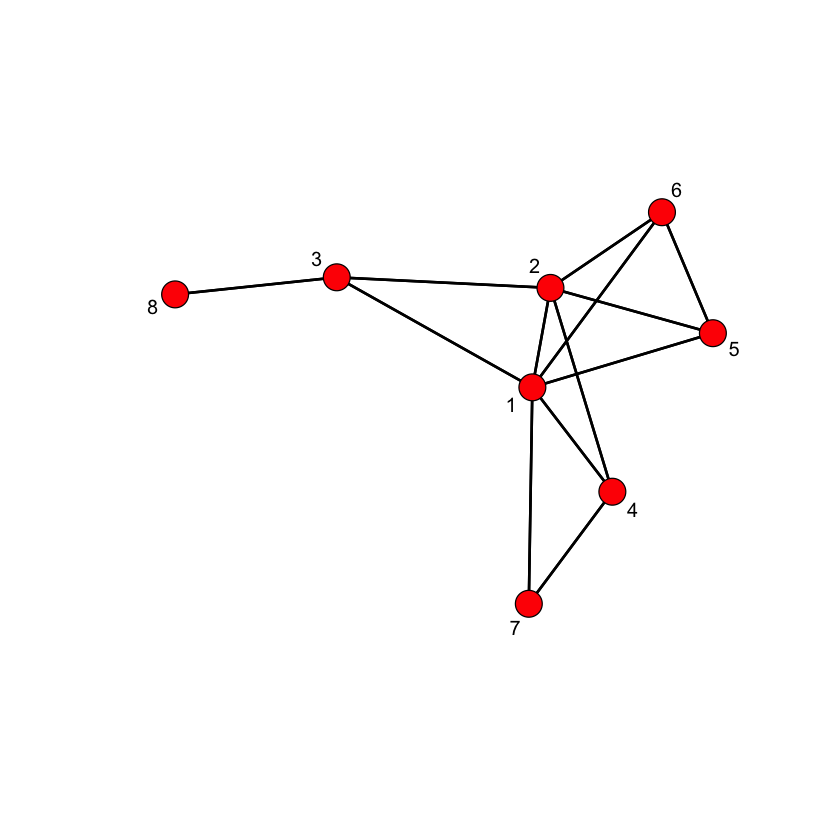

In [43]:
gplot(A, gmode = "graph", displaylabels = TRUE)

## 集中度
- ここまでは，グラフに含まれる各頂点の特徴を示す指標としての点中心性指標を扱ってきた．
- 以下では，**グラフの構造がどの程度中心化されているか**というグラフ・レベルでの中心性指標を扱う.
- グラフに含まれる頂点には中心性の高いものから低いものまである．
    - それらの間の大きさも様々である．
- **集中度**(centralization)や**中心化傾向**あるいは**グラフ中心性**(graph centrality)と呼ばれる指標は，グラフにおいて高い中心性が特定の頂点に集中している程度を示すための指標である．
- グラフの集中度を測るためには，現在採用した中心性指標における最大の中心性の値から，他の頂点の中心性の値を引くことによって得られる差の和を用いる．
- $C_x(i)$: ある中心性指標において，頂点$i$が示す値，$C_x(i^*)$: グラフにおけるその指標の最大値とする．
- このとき，グラフの集中度$C_x$は以下のようになる．

$$
\begin{equation*}
    C_x = \frac{\sum_{i=1}^n [ C_x(i^*) - C_x(i)]}{max \sum_{i=1}^n [ C_x(i^*) - C_x(i)]}
\end{equation*}
$$

## 分析例

### エイズと診断された同性愛者の性関係ネットワークの分析.


In [1]:
library(sna)

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following object is masked from ‘package:base’:

    order


Loading required package: network

network: Classes for Relational Data
Version 1.15 created on 2019-04-01.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




In [2]:
edgelist <- matrix(c(1,2,2,5,3,5,4,5,5,6,5,11,7,8,8,9,9,10,8,11,11,16,
12,16,13,14,14,16,15,16,16,17,16,20,16,21,16,22,18,20,19,20,19,28,22,
23,23,24,22,25,22,26,26,27,26,28,26,31,28,29,29,30,31,32,32,33,32,34,
33,34,34,35,31,36,36,37,26,38,38,39,38,40), ncol = 2, byrow = TRUE)

In [8]:
net <- matrix(0, 40, 40)
for (i in 1:nrow(edgelist))
    net[edgelist[i, 1], edgelist[i, 2]] <- 1

In [9]:
net <- symmetrize(net)   # symmetrize: snaパッケージのやつで対称行列を作る
net

0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0


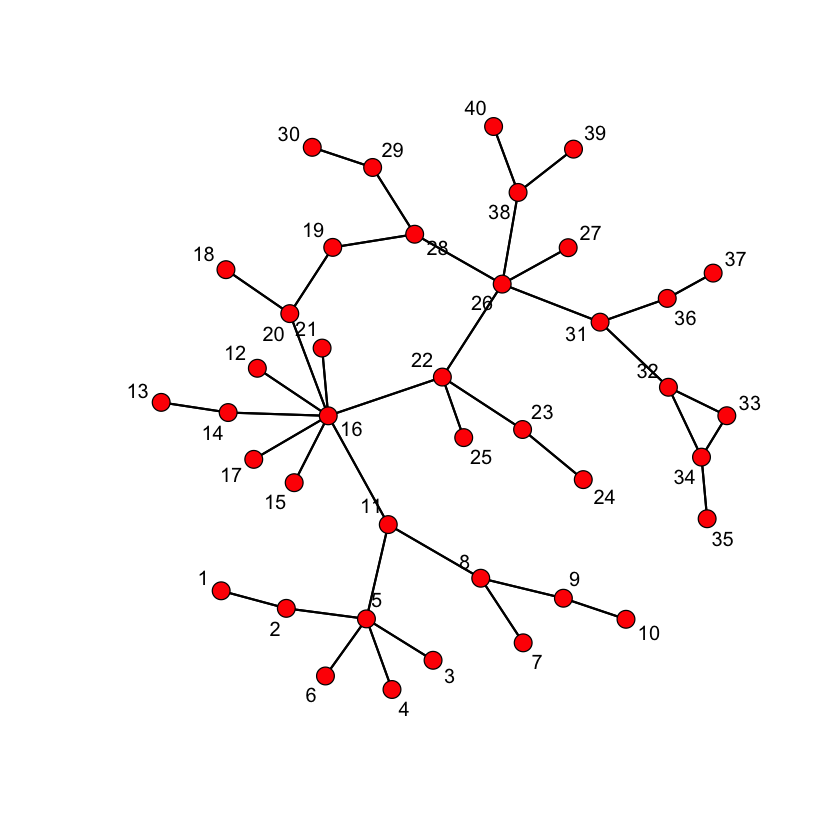

In [13]:
gplot(net, gmode = "graph", displaylabels = TRUE)

## 中心性の算出
- 情報中心性

In [10]:
information <- infocent(net)
information

[1] 0.1853282 0.2249297 0.2224282 0.2224282 0.2820212 0.2224282 0.2175884
 [8] 0.2742857 0.2199817 0.1819560 0.3513909 0.2988792 0.2355250 0.3034134
[15] 0.2988792 0.4173913 0.2988792 0.2663707 0.3356643 0.3566122 0.2988792
[22] 0.3915171 0.2895054 0.2270577 0.2853746 0.3877221 0.2833530 0.3483309
[29] 0.2651934 0.2118270 0.3096774 0.2481903 0.2160216 0.2168022 0.1797753
[36] 0.2421796 0.1968827 0.2916160 0.2283539 0.2283539

In [11]:
# 媒介中心性
betweenness <- betweenness(net, rescale = TRUE) * 100   # rescale = TRUEで各頂点の中心性の和が1になるように規格化される
betweenness

[1]  0.000000  1.402732  0.000000  0.000000  6.607604  0.000000  0.000000
 [8]  4.060539  1.402732  0.000000 11.590993  0.000000  0.000000  1.402732
[15]  0.000000 17.571059  0.000000  0.000000  1.661130  3.137689  0.000000
[22] 13.473606  1.402732  0.000000  0.000000 14.027316  0.000000  3.691399
[29]  1.402732  0.000000  7.604282  3.986711  0.000000  1.402732  0.000000
[36]  1.402732  0.000000  2.768549  0.000000  0.000000

In [12]:
# 近接中心性
closeness <- closeness(net)    # この近接中心性は標準化されたものが算出される
closeness

[1] 0.1688312 0.2020725 0.2000000 0.2000000 0.2484076 0.2000000 0.1959799
 [8] 0.2422360 0.1979695 0.1659574 0.3023256 0.2617450 0.2108108 0.2653061
[15] 0.2617450 0.3513514 0.2617450 0.2203390 0.2653061 0.2805755 0.2617450
[22] 0.3451327 0.2617450 0.2085561 0.2582781 0.3223140 0.2452830 0.2617450
[29] 0.2108108 0.1748879 0.2653061 0.2178771 0.1813953 0.1822430 0.1547619
[36] 0.2131148 0.1764706 0.2516129 0.2020725 0.2020725

In [14]:
nrow(net)

[1] 40

In [15]:
# 次数中心性
degree <- degree(net) / (2 * (nrow(net) - 1))  # 無向グラフの場合の標準化
degree

[1] 0.02564103 0.05128205 0.02564103 0.02564103 0.12820513 0.02564103
 [7] 0.02564103 0.07692308 0.05128205 0.02564103 0.07692308 0.02564103
[13] 0.02564103 0.05128205 0.02564103 0.20512821 0.02564103 0.02564103
[19] 0.05128205 0.07692308 0.02564103 0.10256410 0.05128205 0.02564103
[25] 0.02564103 0.12820513 0.02564103 0.07692308 0.05128205 0.02564103
[31] 0.07692308 0.07692308 0.05128205 0.07692308 0.02564103 0.05128205
[37] 0.02564103 0.07692308 0.02564103 0.02564103

### 中心性の高さでソートする

In [16]:
info_max = sort(information, index.return = TRUE, decreasing = TRUE)  # 情報中心性
between_max = sort(betweenness, index.return = TRUE, decreasing = TRUE)  # 媒介中心性
close_max = sort(closeness, index.return = TRUE, decreasing = TRUE)  # 近接中心性のソート
deg_max = sort(degree, index.return = TRUE, decreasing = TRUE)   # 次数中心性のソート

In [20]:
info_max

$x
 [1] 0.4173913 0.3915171 0.3877221 0.3566122 0.3513909 0.3483309 0.3356643
 [8] 0.3096774 0.3034134 0.2988792 0.2988792 0.2988792 0.2988792 0.2916160
[15] 0.2895054 0.2853746 0.2833530 0.2820212 0.2742857 0.2663707 0.2651934
[22] 0.2481903 0.2421796 0.2355250 0.2283539 0.2283539 0.2270577 0.2249297
[29] 0.2224282 0.2224282 0.2224282 0.2199817 0.2175884 0.2168022 0.2160216
[36] 0.2118270 0.1968827 0.1853282 0.1819560 0.1797753

$ix
 [1] 16 22 26 20 11 28 19 31 14 21 12 15 17 38 23 25 27  5  8 18 29 32 36 13 39
[26] 40 24  2  6  3  4  9  7 34 33 30 37  1 10 35

In [22]:
round(info_max$x, 2)

[1] 0.42 0.39 0.39 0.36 0.35 0.35 0.34 0.31 0.30 0.30 0.30 0.30 0.30 0.29 0.29
[16] 0.29 0.28 0.28 0.27 0.27 0.27 0.25 0.24 0.24 0.23 0.23 0.23 0.22 0.22 0.22
[31] 0.22 0.22 0.22 0.22 0.22 0.21 0.20 0.19 0.18 0.18

In [23]:
centralities <- matrix(c(info_max$ix, round(info_max$x, 3), 
                         between_max$ix, round(between_max$x, 1), 
                         close_max$ix, round(close_max$x, 3), 
                         deg_max$ix, round(deg_max$x, 3)), 
                       nrow = 40)

In [25]:
colnames(centralities) <- c("id", "infomation centrality", "id", "betweenness centrality", "id", "closeness centrality", "id", "degree centrality")

In [26]:
centralities

id,infomation centrality,id,betweenness centrality,id,closeness centrality,id,degree centrality
16,0.417,16,17.6,16,0.351,16,0.205
22,0.392,26,14.0,22,0.345,5,0.128
26,0.388,22,13.5,26,0.322,26,0.128
20,0.357,11,11.6,11,0.302,22,0.103
11,0.351,31,7.6,20,0.281,8,0.077
28,0.348,5,6.6,14,0.265,11,0.077
19,0.336,8,4.1,19,0.265,20,0.077
31,0.310,32,4.0,31,0.265,28,0.077
14,0.303,28,3.7,12,0.262,31,0.077
21,0.299,20,3.1,15,0.262,32,0.077


- 表から明らかのように，どの中心性指標でも16番目に割り振られている頂点が重要であることを示している．
- グラフ再掲 (実行するたびに、毎回少しばかり形や配置が変わるごとに注意) 

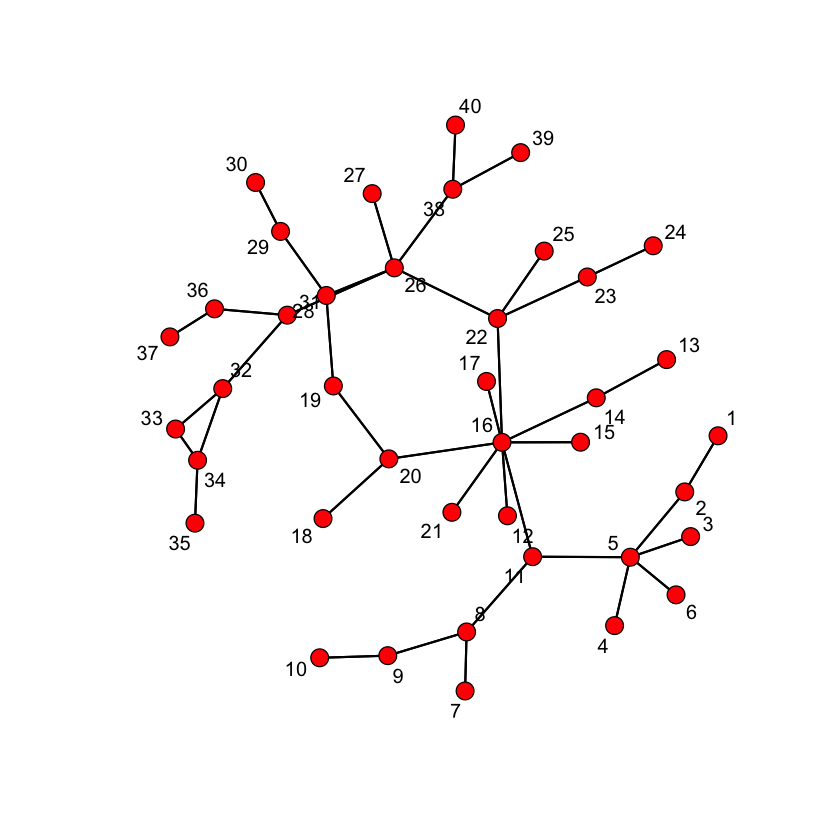

In [27]:
gplot(net, gmode = "graph", displaylabels = TRUE)

## 考察
- このように中心性の値を見るだけでも色々と興味深いことがわかってくる
- どの中心性指標においても頂点16が最上位なので，この頂点がこのネットワーク(エイズの感染)において中心的な役割を果たしていることがわかる．
    - このことから，頂点16からエイズ感染が広がったと見るのが妥当である．
- また，辺を一つしか持たなに頂点12と15に注目してみると，次数中心性と媒介中心性の観点から見ると順位は低いが，情報中心性と近接中心性の立場から見ると，逆に上位に来ている．
- これは，頂点16とつながっているので，情報中心性と近接中心性という立場から見ると，重要な辺に最短距離でつながっているので順位が高いといった具合である．
- また次に頂点14と頂点28について見てみよう．
- 情報中心性では，頂点28の方が上位なのに対して，近接中心性では14の方が上位に位置している．
- これの理由は，エイズ感染は頂点16から始まったと考えられるので，そうすると，頂点13への媒介となってそこで感染が止まった頂点14よりも，頂点28の方がエイズ感染の広がりにおける重要度が高かったことは上の図を見ても明らかである．

#### よって，感染のネットワークにおける有効な感染源を探すなら次数中心性, 有用な媒介者を探すなら情報中心性を用いれば比較的良いことが見て取れる．

### しかし，ネットワークの種類によって有効となる中心性指標は変わることは絶対に忘れてはならない．

## 2部グラフの中心性
- これまで扱ってきた中心性指標は，1モードすなわち，正方行列の隣接行列で表されるネットワークを分析するためのものであった．
- ここでは行数と列数が異なる行列をグラフ表現とする*2部グラフ*について考える．
- と思ったが，なんかマイナーっぽいので次に行く．